# Case study 1: Constant mortality risk in *Frontinella pyramitela*

In [1]:
from collections import defaultdict

import numpy as np

import figures
from cohort_model import (
    get_mean_and_std,
    population_survivorship_difference, 
    run_simulation,
    HYP_WILD_TYPE, 
    MUTANT_CAP,
    MUTANT_WILD
)
from fitness import get_fitness_data

## Survivorship curves (Figure 1 in paper)

In [2]:
# Figure 1 parameters
individual_count = 1000 # Also used in figure 2
alpha = 0.000222             # Also used in figure 2
kappa = 0.033                # Also used in figure 2
epsilon = 0.04
hazard_rate_wt = 0.04015625 # 0.03855/(1 - epsilon) # TODO: Vise hvordan 0.03855 ble funnet
repetition_count = 100
t_m_captivity = 201
t_m_wild = 100
t_m_hyp_wt = 100

# Instantiate dictionary with parameters common to all three populations
hazard_rate_parameters = dict(hazard_rate_wt=hazard_rate_wt, epsilon=epsilon, alpha=alpha, kappa=kappa)

In [3]:
%%time
# Mutant captivity population
hazard_rate_parameters["population"] = MUTANT_CAP
captivity_population = run_simulation(repetition_count, individual_count, hazard_rate_parameters, t_m_captivity)

# Mutant wild population
hazard_rate_parameters["population"] = MUTANT_WILD
wild_population = run_simulation(repetition_count, individual_count, hazard_rate_parameters, t_m_wild)

# Hypothetical wild type population
hazard_rate_parameters["population"] = HYP_WILD_TYPE
hyp_wt_population = run_simulation(repetition_count, individual_count, hazard_rate_parameters, t_m_hyp_wt)

CPU times: user 8.43 s, sys: 8.01 s, total: 16.4 s
Wall time: 17.8 s


In [4]:
mean_captivity, std_captivity = get_mean_and_std(captivity_population)
mean_wild, _ = get_mean_and_std(wild_population)
mean_hyp_wt, std_hyp_wt = get_mean_and_std(hyp_wt_population)

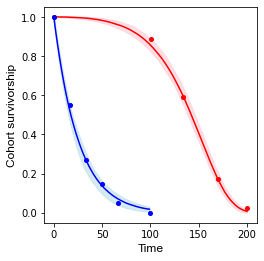

In [5]:
figures.plot_fig_1(
    t_m_captivity=t_m_captivity,
    t_m_wild=t_m_wild,
    t_m_hyp_wt=t_m_hyp_wt,
    mean_captivity=mean_captivity, 
    std_captivity=std_captivity, 
    mean_wild=mean_wild,
    mean_hyp_wt=mean_hyp_wt,
    std_hyp_wt=std_hyp_wt
)

## Predicted temporal difference between hypothetical wild type and mutant survivorship (Figure 2 in paper)

In [6]:
# Figure 2 parameters
repetition_count = 1000 # Also used in figure 3
t_m = 100  # Also used in figure 3
epsilons = np.array([0.01, 0.02, 0.03, 0.04])
hazard_rates_wt = np.array([0.03893939, 0.03933673, 0.039742268,0.04015625]) # based on previous least-squares fitting: (1-epsilon)p_wt = 0.0385499

In [7]:
%%time
hazard_rate_parameters = dict(alpha=alpha, kappa=kappa)
population_simulations, mean_diff, std_diff = population_survivorship_difference(
    individual_count=individual_count,
    repetition_count=repetition_count,
    epsilons=epsilons,
    hazard_rates_wt=hazard_rates_wt,
    t_m=t_m,
    populations=(MUTANT_WILD, HYP_WILD_TYPE),
    hazard_rate_parameters=hazard_rate_parameters
)

CPU times: user 2min 2s, sys: 1min 36s, total: 3min 39s
Wall time: 3min 45s


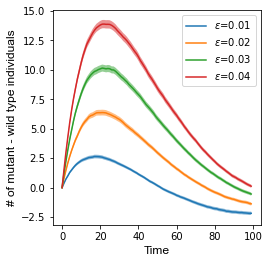

In [8]:
figures.plot_fig_2(t_m, mean_diff, std_diff, repetition_count)

## Pairwise comparison of predicted lifetime reproductive success and intrinsic rate of increase for the hypothetical wild type and mutant females (Figure 3 in paper)

In [9]:
# Figure 3 parameters
# The population_simulations parameter is carried over as a result from calculations for figure 2
fertility_wt = [(39, 24.0), (79, 24.0)]
fertility_mut = [(39, 24.0), (79, 18.0)]

In [12]:
%%time
fitness_stats_wt = get_fitness_data(population_simulations[HYP_WILD_TYPE], fertility_wt)
fitness_stats_mut = get_fitness_data(population_simulations[MUTANT_WILD], fertility_mut)

CPU times: user 1.43 s, sys: 24.3 ms, total: 1.45 s
Wall time: 1.46 s


Increase in R0 from hypothetical wild type to mutant: 1.36%
Increase in r from hypothetical wild type to mutant: 2.76%


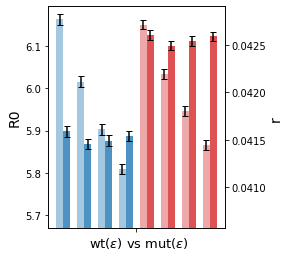

In [13]:
figures.plot_fig_3(fitness_stats_wt, fitness_stats_mut)

mean_r0_wt = fitness_stats_wt["mean_r0"]
mean_r_wt = fitness_stats_wt["mean_r"]
mean_r0_mut = fitness_stats_mut["mean_r0"]
mean_r_mut = fitness_stats_mut["mean_r"]

print(f"Increase in R0 from hypothetical wild type to mutant: {(mean_r0_mut[3] - mean_r0_wt[3]) / mean_r0_wt[3] * 100:.2f}%")
print(f"Increase in r from hypothetical wild type to mutant: {(mean_r_mut[3] - mean_r_wt[3]) / mean_r_wt[3] * 100:.2f}%")